## Depression Detection Demostration

In [1]:
import os
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

import pandas as pd
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.data import random_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, DataCollatorWithPadding, DistilBertConfig
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
!unzip Depression_Detection.csv.zip

Archive:  Depression_Detection.csv.zip
  inflating: Depression_Detection.csv  


In [3]:
df = pd.read_csv('Depression_Detection.csv')
df.columns

Index(['Timestamp', 'your_comment_for_this_semester'], dtype='object')

In [4]:
print("Loading LIWC emoji Tokenizer")
tokenizer = DistilBertTokenizer.from_pretrained('emoji_liwc_tokenizer', do_lower_case=False, tokenize_chinese_chars= False)
# print(len(tokenizer))

Loading LIWC emoji Tokenizer


In [5]:
print("Loading Pretrained Model ...")
configuration = DistilBertConfig(seq_classif_dropout = 0.2, dropout = 0.3)
model = DistilBertForSequenceClassification(configuration)
model.resize_token_embeddings(len(tokenizer))

print("Loading MLM Pretrained weights")
model.load_state_dict(torch.load('model_epoch_1_num194'), strict = False)

Loading Pretrained Model ...
Loading MLM Pretrained weights


<All keys matched successfully>

In [6]:
df = df['your_comment_for_this_semester']

In [7]:
predictions = []
for sentence in df:
    print(sentence)
    inputs = tokenizer.__call__(
            sentence ,
            None,
            # pad_to_max_length=True,
            add_special_tokens=True,
            return_attention_mask=True,
            max_length=64,
            truncation=True,
            padding = 'max_length',
            return_tensors = "pt"
        ).to(device)
    # input_ids = inputs.input_ids
    # attention_mask = inputs.attention_mask
    # print(inputs)
    # with torch.no_grad:
    model.eval()
    model.to(device)    
    outputs = model(**inputs)
    # print(outputs.logits)
    prediction = torch.argmax(outputs.logits, dim = 1)
    predictions.append(prediction.item())
    # break

Happy final week!!
its hellishly hot these days
quite stresful, but proud to be able to manage it
Mom, help me!!!
Im planning for my vacations right now
shitty!!!
pretty sad that the term is over
I am ok
I'm ok
I'm okay.
I am happy now 🥳
your soul is mine.
Trying to understand myself.
Good Job :)
I'm worried I don't know what topic I should select for thesis🥲🥲
I gonna die before this semester 😭😭😭😭
Well Done🥳🥳
Good bye, Chakky 👋🏻👋🏻👋🏻
I am happy now 😊😊😊😊😊😊


In [8]:
print(predictions)
predict = pd.Series(predictions)

[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]


In [9]:
df = pd.concat((df, predict), axis = 1)
predicted = df.copy()

In [10]:
predicted.columns = ['Your_Comment', 'Prediction']

In [11]:
predicted.loc[predicted['Prediction'] == 0, 'Prediction'] = 'Not_Depressed'
predicted.loc[predicted['Prediction'] == 1, 'Prediction'] = 'Depressed'

predicted

,Your_Comment,Prediction
0,Happy final week!!,Depressed
1,its hellishly hot these days,Not_Depressed
2,"quite stresful, but proud to be able to manage it",Depressed
3,"Mom, help me!!!",Not_Depressed
4,Im planning for my vacations right now,Depressed
5,shitty!!!,Not_Depressed
6,pretty sad that the term is over,Depressed
7,I am ok,Not_Depressed
8,I'm ok,Not_Depressed
9,I'm okay.,Depressed


In [12]:
predicted.sort_values(by = ['Prediction']).reset_index(drop = True)

,Your_Comment,Prediction
0,Happy final week!!,Depressed
1,I'm worried I don't know what topic I should s...,Depressed
2,Trying to understand myself.,Depressed
3,your soul is mine.,Depressed
4,"Good bye, Chakky 👋🏻👋🏻👋🏻",Depressed
5,pretty sad that the term is over,Depressed
6,I'm okay.,Depressed
7,Im planning for my vacations right now,Depressed
8,"quite stresful, but proud to be able to manage it",Depressed
9,I am happy now 😊😊😊😊😊😊,Depressed


In [13]:
print_scores = df.loc[:, 0].sum()/len(df)

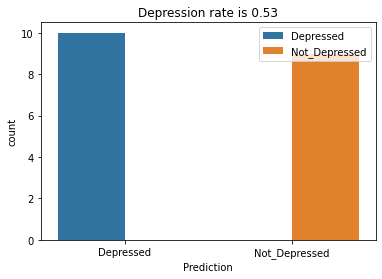

In [14]:
sns.countplot(data = predicted, x = 'Prediction', hue ='Prediction')
plt.title(f'Depression rate is {round(print_scores,2)}')
plt.legend()

In [15]:
pd.options.display.max_colwidth = 128